In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) Load dataset

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
# Check if exists na data
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.shape

(1338, 7)

## 2) Análise exploratória
Vamos entender melhor as features do dataset

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Antes de continuar a análise, vamos encontrar a sqrt(n) (raiz do numero de amostras)

In [6]:
k = df.shape[0] ** 0.5
k = round(k)

### age

In [7]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [8]:
df['age'].value_counts(True).head()

18    0.051570
19    0.050822
50    0.021674
51    0.021674
47    0.021674
Name: age, dtype: float64

<AxesSubplot:>

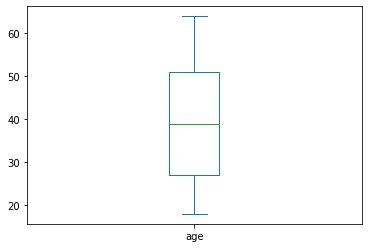

In [9]:
df['age'].plot.box()

<AxesSubplot:ylabel='Frequency'>

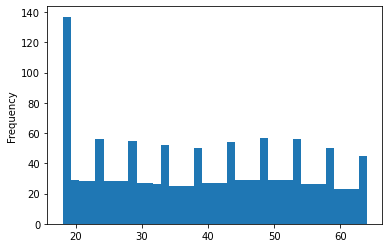

In [10]:
df['age'].plot.hist(bins=k)

Poucos outliers e não podemos fazer muito a respeito dos dados da idade. 
Conclusão:
- Vamos deixar como tá

### sex

In [11]:
df['sex'].value_counts(True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

Note que os valores de homens e mulheres estão meio a meio.
Conclusão:
- Vamos manter do jeito que tá
- Vamos aplicar OrdinalEnconder nessa feature categórica 

In [12]:
from sklearn.preprocessing import OrdinalEncoder

C:\Users\gabri\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [13]:
ordinal_encoder_sex = OrdinalEncoder()

In [14]:
sex_encoded = ordinal_encoder_sex.fit_transform(df[['sex']])

In [15]:
pd.Series(sex_encoded[:, 0]).value_counts(True)

1.0    0.505232
0.0    0.494768
dtype: float64

In [16]:
sex_encoded = pd.Series(sex_encoded[:, 0])

In [17]:
sex_encoded

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1333    1.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Length: 1338, dtype: float64

In [18]:
df.sex = sex_encoded

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,yes,southwest,16884.92400
1,18,1.0,33.770,1,no,southeast,1725.55230
2,28,1.0,33.000,3,no,southeast,4449.46200
3,33,1.0,22.705,0,no,northwest,21984.47061
4,32,1.0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,no,northwest,10600.54830
1334,18,0.0,31.920,0,no,northeast,2205.98080
1335,18,0.0,36.850,0,no,southeast,1629.83350
1336,21,0.0,25.800,0,no,southwest,2007.94500


### bmi

In [20]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

<AxesSubplot:>

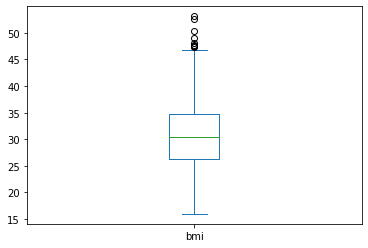

In [21]:
df['bmi'].plot.box()

Alguns outliers, vamos analisar o histograma

<AxesSubplot:ylabel='Frequency'>

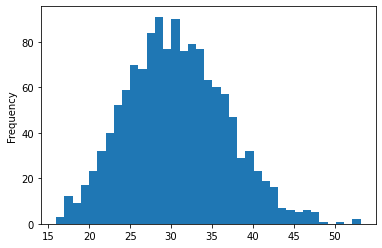

In [22]:
df['bmi'].plot.hist(bins=k)

Nota-se um pouco de assimetria a direita. É possível que utilizar o log do valor dessa coluna possa ajudar a tirar essa assimetria dos dados. Vamos tentar!

<AxesSubplot:ylabel='Frequency'>

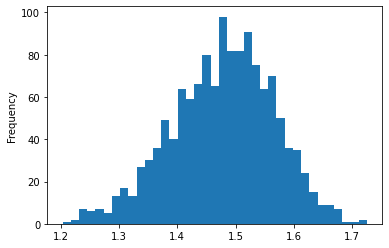

In [23]:
df['bmi'].apply(np.log10).plot.hist(bins=k)

Note que melhorou a assimetria. Vamos manter o valor do log.

Conclusão:
- Não vamos cortar nenhum ponto.
- Vamos aplicar o log10 na coluna.

In [24]:
df['bmi'] = df['bmi'].apply(np.log10)

In [25]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,1.445604,0,yes,southwest,16884.92400
1,18,1.0,1.528531,1,no,southeast,1725.55230
2,28,1.0,1.518514,3,no,southeast,4449.46200
3,33,1.0,1.356122,0,no,northwest,21984.47061
4,32,1.0,1.460597,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,1.490941,3,no,northwest,10600.54830
1334,18,0.0,1.504063,0,no,northeast,2205.98080
1335,18,0.0,1.566437,0,no,southeast,1629.83350
1336,21,0.0,1.411620,0,no,southwest,2007.94500


### children

In [26]:
df['children']

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

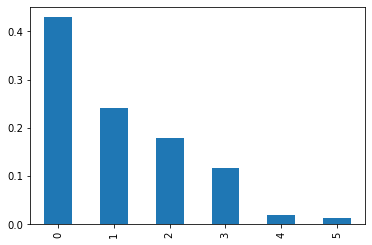

In [27]:
df['children'].value_counts(True).plot(kind='bar');

Conclusão:
- Não vamos mexer aqui

### smoker

In [28]:
df['smoker'].value_counts(True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

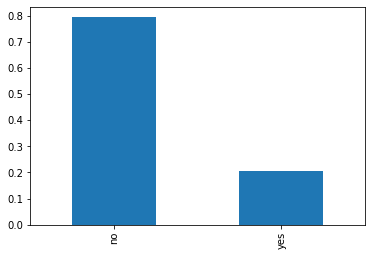

In [29]:
df['smoker'].value_counts(True).plot(kind='bar');

Note que esta é uma variável categórica, logo, vamos transformar ela em valores numéricos utilizando o OrdinalEncoder do ScikitLearn

In [30]:
ordinal_enconder = OrdinalEncoder()

In [31]:
smoke_encoded = ordinal_enconder.fit_transform(df[['smoker']])

In [32]:
pd.Series(smoke_encoded[:, 0]).value_counts(True)

0.0    0.795217
1.0    0.204783
dtype: float64

In [33]:
smoke_encoded = pd.Series(smoke_encoded[:, 0])

In [34]:
smoke_encoded

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1333    0.0
1334    0.0
1335    0.0
1336    0.0
1337    1.0
Length: 1338, dtype: float64

In [35]:
df.smoker = smoke_encoded

In [36]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,1.445604,0,1.0,southwest,16884.92400
1,18,1.0,1.528531,1,0.0,southeast,1725.55230
2,28,1.0,1.518514,3,0.0,southeast,4449.46200
3,33,1.0,1.356122,0,0.0,northwest,21984.47061
4,32,1.0,1.460597,0,0.0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,1.490941,3,0.0,northwest,10600.54830
1334,18,0.0,1.504063,0,0.0,northeast,2205.98080
1335,18,0.0,1.566437,0,0.0,southeast,1629.83350
1336,21,0.0,1.411620,0,0.0,southwest,2007.94500


Conclusão:
- Usamos OrdinalEncoder para transformar o valor de smoker (categórico) em número de forma binária.

### region

In [37]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [38]:
df['region'].value_counts(True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

Note que para cada região os valores estão bem distribuidos

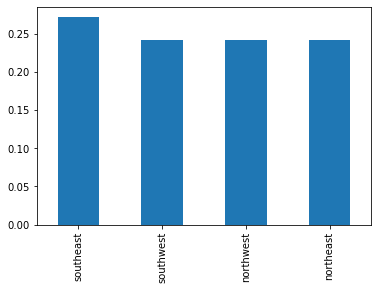

In [39]:
df['region'].value_counts(True).plot(kind='bar');

Valores categóricos novamente, vamos utilizar dessa vez o One-hot-Encoder para codificar os valores como falsas features binárias.

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
region_enconder = OneHotEncoder()

In [42]:
region_1hot = region_enconder.fit_transform(df[['region']])

In [43]:
region_1hot.toarray(), region_1hot.toarray().shape

(array([[0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.]]),
 (1338, 4))

In [44]:
region_enconder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [45]:
(
    (pd.Series(region_1hot.toarray()[:, 0]).value_counts(True), 'northeast'),
    (pd.Series(region_1hot.toarray()[:, 1]).value_counts(True), 'northwest'),
    (pd.Series(region_1hot.toarray()[:, 2]).value_counts(True), 'southeast'),
    (pd.Series(region_1hot.toarray()[:, 3]).value_counts(True), 'southwest'),
)

((0.0    0.757848
  1.0    0.242152
  dtype: float64,
  'northeast'),
 (0.0    0.7571
  1.0    0.2429
  dtype: float64,
  'northwest'),
 (0.0    0.727952
  1.0    0.272048
  dtype: float64,
  'southeast'),
 (0.0    0.7571
  1.0    0.2429
  dtype: float64,
  'southwest'))

In [46]:
northeast_feat = pd.DataFrame(pd.Series(region_1hot.toarray()[:, 0]), columns=['northeast'])
northwest_feat = pd.DataFrame(pd.Series(region_1hot.toarray()[:, 1]), columns=['northwest'])
southeast_feat = pd.DataFrame(pd.Series(region_1hot.toarray()[:, 2]), columns=['southeast'])
southwest_feat = pd.DataFrame(pd.Series(region_1hot.toarray()[:, 3]), columns=['southwest'])

Pronto, criamos 4 features binárias com o One Hot Encoder, vamos concatenar ao df e retirar a coluna de region

In [47]:
region = pd.concat([northeast_feat, northwest_feat, southeast_feat, southwest_feat], axis=1)
region

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [48]:
df = pd.concat([df, region], axis=1)
df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0.0,1.445604,0,1.0,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1.0,1.528531,1,0.0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1.0,1.518514,3,0.0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1.0,1.356122,0,0.0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1.0,1.460597,0,0.0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1.0,1.490941,3,0.0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,0.0,1.504063,0,0.0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,0.0,1.566437,0,0.0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,0.0,1.411620,0,0.0,southwest,2007.94500,0.0,0.0,0.0,1.0


In [49]:
df.drop('region', axis=1, inplace=True)

In [50]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0.0,1.445604,0,1.0,16884.92400,0.0,0.0,0.0,1.0
1,18,1.0,1.528531,1,0.0,1725.55230,0.0,0.0,1.0,0.0
2,28,1.0,1.518514,3,0.0,4449.46200,0.0,0.0,1.0,0.0
3,33,1.0,1.356122,0,0.0,21984.47061,0.0,1.0,0.0,0.0
4,32,1.0,1.460597,0,0.0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1.0,1.490941,3,0.0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0.0,1.504063,0,0.0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0.0,1.566437,0,0.0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0.0,1.411620,0,0.0,2007.94500,0.0,0.0,0.0,1.0


Conclusão:
- Criamos novas features a partir de uma feature categórica que indica região!
- Retiramos a coluna original que utilizamos no one hot encoder

### charges

Por fim, vamos analisar nosso target e estudar seu comportamento

In [51]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:>

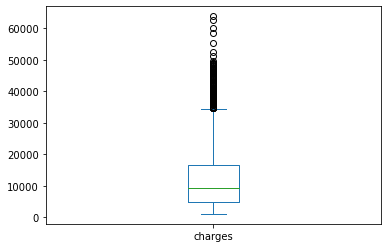

In [52]:
df['charges'].plot.box()

Note a quantidade de outliers!! Vamos analiser o histograma

<AxesSubplot:ylabel='Frequency'>

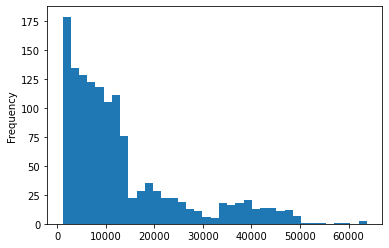

In [53]:
df['charges'].plot.hist(bins=k)

Muita assimetria e alguns dados não parecem estar conexos. Vamos tentar aplicar o log

<AxesSubplot:ylabel='Frequency'>

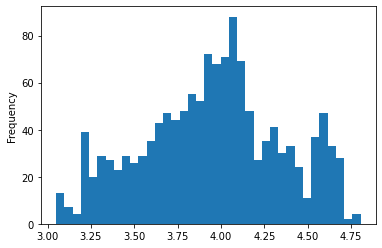

In [54]:
df['charges'].apply(np.log10).plot.hist(bins=k)

Nada que ajude muito, mas parece estar mais comportado.


Conclusão:
- Vamos utilizar o log10 (com dúvidas).

In [55]:
df['charges'] = df['charges'].apply(np.log10)

In [56]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0.0,1.445604,0,1.0,4.227499,0.0,0.0,0.0,1.0
1,18,1.0,1.528531,1,0.0,3.236928,0.0,0.0,1.0,0.0
2,28,1.0,1.518514,3,0.0,3.648308,0.0,0.0,1.0,0.0
3,33,1.0,1.356122,0,0.0,4.342116,0.0,1.0,0.0,0.0
4,32,1.0,1.460597,0,0.0,3.587358,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1.0,1.490941,3,0.0,4.025328,0.0,1.0,0.0,0.0
1334,18,0.0,1.504063,0,0.0,3.343602,1.0,0.0,0.0,0.0
1335,18,0.0,1.566437,0,0.0,3.212143,0.0,0.0,1.0,0.0
1336,21,0.0,1.411620,0,0.0,3.302752,0.0,0.0,0.0,1.0


## Checar Correlação e importância de features

In [57]:
df.corr().transpose()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.116146,0.042469,-0.025019,0.527834,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046075,0.017163,0.076185,0.005632,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.116146,0.046075,1.000000,0.013058,0.000366,0.137924,-0.141961,-0.125392,0.257012,0.000496
children,0.042469,0.017163,0.013058,1.000000,0.007673,0.161336,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.000366,0.007673,1.000000,0.665506,0.002811,-0.036945,0.068498,-0.036945
charges,0.527834,0.005632,0.137924,0.161336,0.665506,1.000000,0.043115,-0.017824,0.015791,-0.041632
northeast,0.002475,-0.002425,-0.141961,-0.022808,0.002811,0.043115,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.125392,0.024806,-0.036945,-0.017824,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.257012,-0.023066,0.068498,0.015791,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,0.000496,0.021914,-0.036945,-0.041632,-0.320177,-0.320829,-0.346265,1.000000


### Graficamente

In [58]:
import seaborn as sns

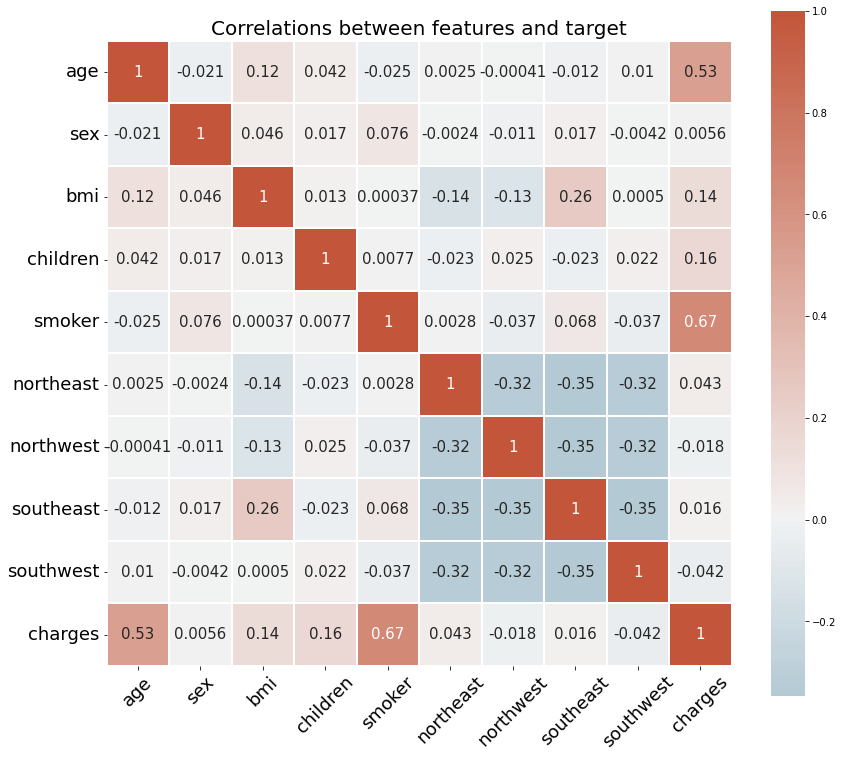

In [59]:
# compute the correlation matrix
columns_corr = [ 
                 'age',
                 'sex',
                 'bmi',
                 'children',
                 'smoker',
                 'northeast',
                 'northwest',
                 'southeast',
                 'southwest',
                 'charges'
               ]

corr = df[columns_corr].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14,14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
colormap = sns.heatmap(corr, 
                       annot=True,
                       annot_kws ={'size':15},
                       cmap=cmap, 
                       vmax=1, 
                       center=0,
                       square=True, 
                       linewidths=2, 
                       cbar_kws={"shrink": .9})

colormap.set_xticklabels(colormap.get_xmajorticklabels(), fontsize=18, rotation=45)
colormap.set_yticklabels(colormap.get_ymajorticklabels(), fontsize=18, rotation=0)

plt.title('Correlations between features and target', size = 20);

Analisando o mapa de calor, é possível visualizar que a região não influencia muito.

Conclusão:
- Vamos descartar as features de menores relavância e ficar com as de maiores correlações:
    - smoker
    - children
    - bmi
    - age

# Construção de modelo

In [60]:
from sklearn.model_selection import learning_curve

In [61]:
columns = df.columns
columns_to_keep = ['smoker', 'children', 'bmi', 'age']
features = [x for x in columns if x in columns_to_keep]
features

['age', 'bmi', 'children', 'smoker']

In [62]:
X, y = df[features], df['charges']

In [63]:
def evaluate_models(algorithm, X, y):
    
    # Learning curve
    N, train_score, val_score = learning_curve(
        algorithm, X, y,
        cv=5, scoring='r2',
        train_sizes=np.linspace(0.1, 1, 10)
    )
    
    # Plot the learning curve
    plt.figure(figsize=(8, 3))
    plt.plot(N, train_score.mean(axis=1), label='train_score')
    plt.plot(N, val_score.mean(axis=1), label='val_score')
    plt.legend()
    plt.title(f'{algorithm}', fontsize=18)
    
#     train_scores.append(train_score[-1].mean())
#     val_scores.append(val_score[-1].mean())
    
    # Print the results
    print(f'{algorithm}')
    print("train_score =", "%0.3f" % train_score[-1].mean())
    print("val_score =", "%0.3f" % val_score[-1].mean())
    plt.show()
    print("-"*20)

## 1) Vamos dividir o data set em train-test-val

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [65]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [66]:
X_scaled = num_pipeline.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,age,bmi,children,smoker
0,-1.438764,-0.367160,-0.908614,1.970587
1,-1.509965,0.576175,-0.078767,-0.507463
2,-0.797954,0.462225,1.580926,-0.507463
3,-0.441948,-1.385070,-0.908614,-0.507463
4,-0.513149,-0.196607,-0.908614,-0.507463
...,...,...,...,...
1333,0.768473,0.148571,1.580926,-0.507463
1334,-1.509965,0.297837,-0.908614,-0.507463
1335,-1.509965,1.007379,-0.908614,-0.507463
1336,-1.296362,-0.753751,-0.908614,-0.507463


In [67]:
y

0       4.227499
1       3.236928
2       3.648308
3       4.342116
4       3.587358
          ...   
1333    4.025328
1334    3.343602
1335    3.212143
1336    3.302752
1337    4.464510
Name: charges, Length: 1338, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.25)

In [70]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.25,
                                                  random_state=52)

## 2) Construindo um modelo de regressão linear simples

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
model_lr = LinearRegression()

In [73]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [74]:
# Score R^2 para conjunto de test
model_lr.score(X_test, y_test)

0.770588018186507

In [75]:
# Score R^2 para conjunto de treinamento
model_lr.score(X_train, y_train)

0.7563845505142128

In [76]:
y_pred = model_lr.predict(X_val)

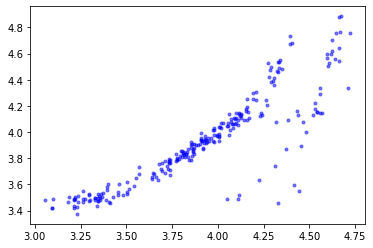

In [77]:
plt.plot(y_val, y_pred, 'b.', alpha=0.5);

In [78]:
from sklearn.metrics import mean_squared_error

LinearRegression()
train_score = 0.763
val_score = 0.760


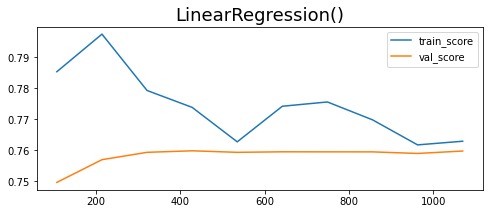

--------------------


In [79]:
evaluate_models(model_lr, X_scaled, y)

## 3) Construindo um modelo de SGDregressor

In [80]:
from sklearn.linear_model import SGDRegressor

In [81]:
model_sgd = SGDRegressor()

In [82]:
model_sgd.fit(X_train, y_train)

SGDRegressor()

In [83]:
X_train

,age,bmi,children,smoker
3,-0.441948,-1.385070,-0.908614,-0.507463
112,-0.157143,0.121378,-0.908614,-0.507463
1034,1.551686,1.208356,-0.908614,-0.507463
965,-0.299545,-0.510888,-0.078767,-0.507463
651,0.982076,1.362951,-0.078767,-0.507463
...,...,...,...,...
409,-0.513149,-0.003700,-0.078767,-0.507463
423,-1.011557,0.087579,-0.908614,-0.507463
417,-0.228344,-1.407970,0.751079,1.970587
586,-1.296362,-1.954054,1.580926,-0.507463


SGDRegressor()
train_score = 0.763
val_score = 0.760


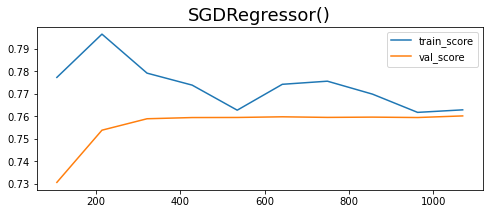

--------------------


In [84]:
evaluate_models(model_sgd, X_scaled, y)

In [85]:
X_test

,age,bmi,children,smoker
764,0.412467,-0.874902,0.751079,-0.507463
887,-0.228344,-0.005345,-0.908614,-0.507463
890,1.765289,-0.550239,-0.908614,1.970587
1293,0.483668,-0.764293,1.580926,-0.507463
259,-1.438764,0.297837,-0.908614,1.970587
...,...,...,...,...
342,1.480485,-0.429527,-0.908614,-0.507463
308,1.338082,0.733823,-0.908614,-0.507463
1128,-0.370746,0.432192,-0.078767,-0.507463
503,-1.438764,0.032361,-0.908614,1.970587


In [86]:
model_sgd.score(X_test, y_test)

0.7705544316290962

### 4) Construindo um modelo GradientBoostingRegressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
model_gbr = GradientBoostingRegressor()

In [97]:
model_gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [98]:
model_gbr.score(X_test, y_test)

0.8149566280175408

In [99]:
model_gbr.score(X_val, y_val)

0.8126076076564638

GradientBoostingRegressor()
train_score = 0.878
val_score = 0.826


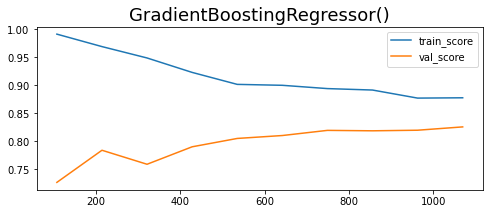

--------------------


In [100]:
evaluate_models(model_gbr, X, y)

In [101]:
y_pred_gbr = pd.Series(model_gbr.predict(X_val))

In [102]:
y_pred_gbr[:10], y_val[:10]

(0    3.838312
 1    3.969478
 2    4.619270
 3    3.909992
 4    4.283074
 5    3.822685
 6    4.646686
 7    4.512329
 8    3.813443
 9    3.844204
 dtype: float64,
 914     3.720780
 740     3.934725
 1037    4.599070
 884     3.688240
 238     4.239367
 176     3.809954
 252     4.646019
 1139    4.567011
 1290    3.853327
 929     3.798634
 Name: charges, dtype: float64)

## 5) Keras MLP

In [194]:
import tensorflow as tf
import tensorflow.keras as keras

In [195]:
model_mlp = keras.models.Sequential([
    keras.layers.Dense(4, activation='elu', input_shape=[4]),
    keras.layers.Dense(100, activation='elu'),
    keras.layers.Dense(100, activation='elu'),
    keras.layers.Dense(1, activation='elu')
])

In [196]:
model_mlp.compile(loss="mean_squared_error", optimizer="sgd")

In [197]:
model_mlp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 100)               500       
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,721
Trainable params: 10,721
Non-trainable params: 0
_________________________________________________________________


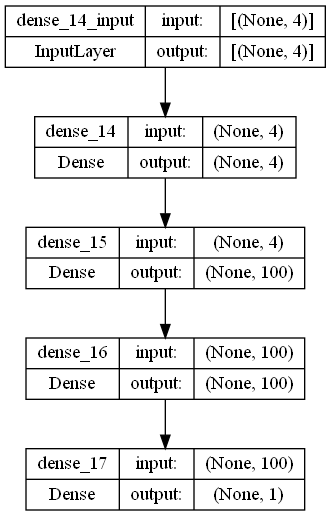

In [198]:
keras.utils.plot_model(model_mlp, to_file="medical_cost.png", show_shapes=True)

In [199]:
X_scaled.iloc[0]

age        -1.438764
bmi        -0.367160
children   -0.908614
smoker      1.970587
Name: 0, dtype: float64

In [200]:
model_mlp.predict(np.array(X_train.iloc[0]).reshape(1, -1))

1/1 [==============================] - 0s 49ms/step


array([[-0.0994004]], dtype=float32)

In [201]:
history_0 = model_mlp.fit(X_train, y_train, epochs=250,
                   validation_data=(X_test, y_test))

Epoch 1/250
24/24 [==============================] - 0s 7ms/step - loss: 3.3287 - val_loss: 0.1259
Epoch 2/250
24/24 [==============================] - 0s 2ms/step - loss: 0.1202 - val_loss: 0.0788
Epoch 3/250
24/24 [==============================] - 0s 3ms/step - loss: 0.0816 - val_loss: 0.0618
Epoch 4/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0654 - val_loss: 0.0525
Epoch 5/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0543 - val_loss: 0.0487
Epoch 6/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0488 - val_loss: 0.0447
Epoch 7/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0448 - val_loss: 0.0429
Epoch 8/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0421 - val_loss: 0.0417
Epoch 9/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0404 - val_loss: 0.0412
Epoch 10/250
24/24 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0405
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.0289 - val_loss: 0.0323
Epoch 84/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0288 - val_loss: 0.0328
Epoch 85/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0285 - val_loss: 0.0326
Epoch 86/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0284 - val_loss: 0.0326
Epoch 87/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0286 - val_loss: 0.0330
Epoch 88/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0285 - val_loss: 0.0324
Epoch 89/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0285 - val_loss: 0.0326
Epoch 90/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0284 - val_loss: 0.0321
Epoch 91/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0283 - val_loss: 0.0327
Epoch 92/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0286 - val_loss: 0.0321
Epoch 93/250


24/24 [==============================] - 0s 2ms/step - loss: 0.0271 - val_loss: 0.0310
Epoch 165/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.0308
Epoch 166/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0270 - val_loss: 0.0314
Epoch 167/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.0311
Epoch 168/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.0310
Epoch 169/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.0309
Epoch 170/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.0307
Epoch 171/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0267 - val_loss: 0.0323
Epoch 172/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0270 - val_loss: 0.0312
Epoch 173/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.0309
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.0263 - val_loss: 0.0304
Epoch 246/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0263 - val_loss: 0.0303
Epoch 247/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0261 - val_loss: 0.0316
Epoch 248/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0262 - val_loss: 0.0308
Epoch 249/250
24/24 [==============================] - 0s 2ms/step - loss: 0.0262 - val_loss: 0.0304
Epoch 250/250
24/24 [==============================] - 0s 3ms/step - loss: 0.0263 - val_loss: 0.0308


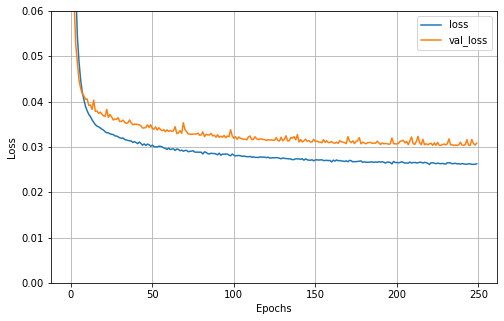

In [203]:
df_history = pd.DataFrame(history_0.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([-0.2, 0.6])
plt.gca().set_ylim(0, 0.06)
plt.show()

In [213]:
np.array(X_train.iloc[0:10])

array([[-0.4419476 , -1.38507037, -0.90861367, -0.5074631 ],
       [-0.15714284,  0.12137819, -0.90861367, -0.5074631 ],
       [ 1.55168573,  1.20835567, -0.90861367, -0.5074631 ],
       [-0.29954522, -0.51088835, -0.07876719, -0.5074631 ],
       [ 0.98207621,  1.36295117, -0.07876719, -0.5074631 ],
       [ 1.33808216,  0.66605376, -0.90861367, -0.5074631 ],
       [ 1.7652893 , -1.16068941, -0.90861367,  1.97058663],
       [-1.50996545,  0.26055126,  0.75107928,  1.97058663],
       [ 1.12447859,  0.01436353,  0.75107928, -0.5074631 ],
       [ 0.05646073, -0.81928831, -0.07876719, -0.5074631 ]])

In [214]:
model_mlp.predict(np.array(X_train.iloc[0:10]))

1/1 [==============================] - 0s 20ms/step


array([[3.6991482],
       [3.7588735],
       [4.1734476],
       [3.8121257],
       [4.0931563],
       [4.1234818],
       [4.3908544],
       [4.4235835],
       [4.085717 ],
       [3.883245 ]], dtype=float32)

In [215]:
y_train

3       4.342116
112     3.667150
1034    4.112272
965     3.676359
651     4.024474
          ...   
409     3.610069
423     3.435748
417     4.269706
586     3.586723
619     4.029937
Name: charges, Length: 752, dtype: float64

In [222]:
X_test

,age,bmi,children,smoker
764,0.412467,-0.874902,0.751079,-0.507463
887,-0.228344,-0.005345,-0.908614,-0.507463
890,1.765289,-0.550239,-0.908614,1.970587
1293,0.483668,-0.764293,1.580926,-0.507463
259,-1.438764,0.297837,-0.908614,1.970587
...,...,...,...,...
342,1.480485,-0.429527,-0.908614,-0.507463
308,1.338082,0.733823,-0.908614,-0.507463
1128,-0.370746,0.432192,-0.078767,-0.507463
503,-1.438764,0.032361,-0.908614,1.970587


In [249]:
y_pred_mlp = model_mlp.predict(np.array(X_val))

8/8 [==============================] - 0s 1ms/step


In [255]:
y_pred_mlp_train = model_mlp.predict(np.array(X_train))

24/24 [==============================] - 0s 1ms/step


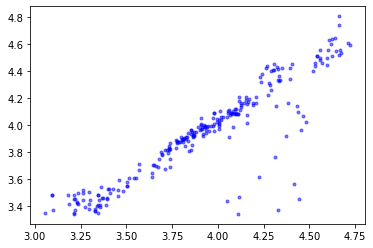

In [256]:
plt.plot(y_val, y_pred_mlp, 'b.', alpha=0.5);

In [260]:
from sklearn.metrics import r2_score

In [261]:
r2_score(y_val, y_pred_mlp)

0.8031174390189664

In [262]:
r2_score(y_train, y_pred_mlp_train)

0.8259954129950446

### True values

In [263]:
y_pred_mlp_true = 10 ** y_pred_mlp

In [264]:
y_val_mlp_true = 10 ** np.array(y_val).reshape(-1, 1)

In [267]:
r2_score(y_val_mlp_true, y_pred_mlp_true)

0.8058141167864801

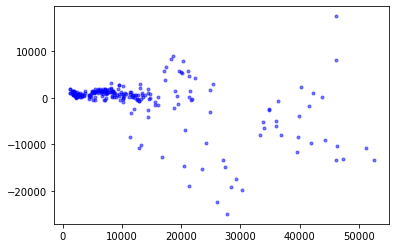

In [268]:
plt.plot(y_val_mlp_true, y_pred_mlp_true - y_val_mlp_true, 'b.', alpha=0.5);

# Conclusões preliminares

1) A partir da análise que fizemos é possível identificar alguns pontos cruciais a respeito dos dados. Em primeiro lugar, na nossa análise exploratória, é possível identificar um forte correlação entre o fato da pessoa fumar e o quanto a pessoa gasta em seu custo médico.

2) Além disso, utilizamos alguns modelos de ML para tentar predizer valores de custo dada as features. 